# Capstone Three - 2. Data Wrangling and EDA<a id='2'></a>

## 2.1 Contents<a id='2.1'></a>
* [2. Data Wrangling and EDA](#2)
  * [2.1 Contents](#2.1)
  * [2.2 Imports](#2.2)
  * [2.3 Load Data](#2.3)
  * [2.4 Explore the Data](#2.4)
    * [2.4.1 Data Info](#2.4.1) 
    * [2.4.2 Data Visualization](#2.4.2)
      * [2.4.2.1 Target](#2.4.2.1)
      * [2.4.2.2 Feature correlation heatmap](#2.4.2.2)
      * [2.4.2.3 Scatterplots and boxplots of numeric features against Class](#2.4.2.3)
  * [2.5 Summary](#2.5)

## 2.2 Imports<a id='2.2'></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from library.sb_utils import save_file

## 2.3 Load Data<a id='2.3'></a>

Download the credit card data from this webpage: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [3]:
data = pd.read_csv("../input_data/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2.4 Explore the Data<a id='2.4'></a>

### 2.4.1 Data Info<a id='2.4.1'></a>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [9]:
data.isnull().sum().sum()

0

**No missing value in this dataset.**

### 2.4.2 Data Visualization<a id='2.4.2'></a>

#### 2.4.2.1 Target<a id='2.4.2.1'></a>

In [27]:
Class_counts = data['Class'].value_counts()
print(Class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


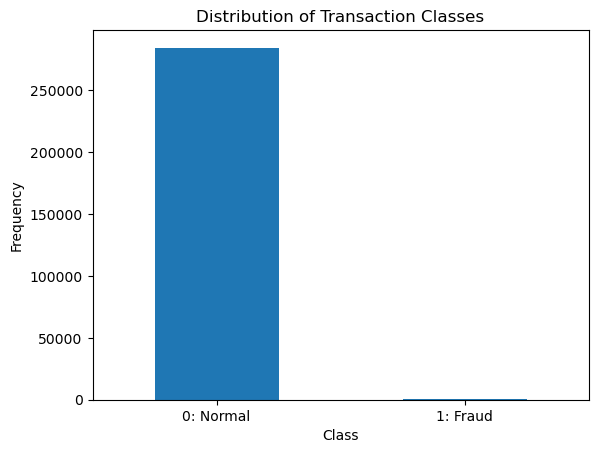

In [26]:
Labels = ["0: Normal", "1: Fraud"]

Class_counts.plot(kind = 'bar', rot=0)
plt.title("Distribution of Transaction Classes")
plt.xticks([0,1], Labels)
plt.xlabel("Class")
plt.ylabel("Frequency");

#### 2.4.2.2 Feature correlation heatmap<a id='2.4.2.2'></a>

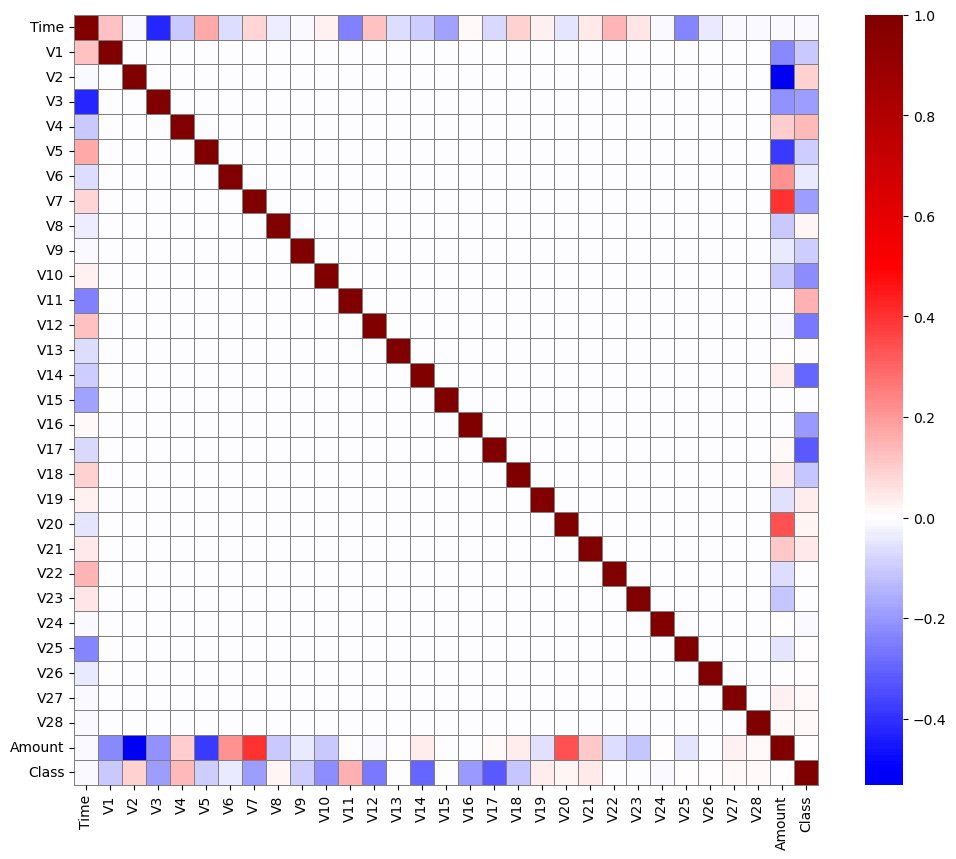

In [60]:
plt.subplots(figsize=(12,10))
sns.heatmap(data.corr(), cmap='seismic', center=0., linewidths=0.5,
            linecolor='gray', clip_on=False);

In [47]:
data[['Time', 'V3', 'V5', 'V11', 'V22', 'V25']].corr().Time

Time    1.00
V3     -0.42
V5      0.17
V11    -0.25
V22     0.14
V25    -0.23
Name: Time, dtype: float64

In [49]:
data[['Amount', 'V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V20']].corr().Amount

Amount    1.00
V1       -0.23
V2       -0.53
V3       -0.21
V5       -0.39
V6        0.22
V7        0.40
V20       0.34
Name: Amount, dtype: float64

In [53]:
data[['Class', 'V3', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']].corr().Class

Class    1.00
V3      -0.19
V7      -0.19
V10     -0.22
V11      0.15
V12     -0.26
V14     -0.30
V16     -0.20
V17     -0.33
Name: Class, dtype: float64

**Highest correlations are:**

corr (Time, V3) = -0.42\
corr (Amount, V2) = -0.53\
corr (Amount, V7) = 0.4

The `V1` to `V28` PCA components don't have linear correlation with each other.

The `Class` column has some positive and negative correlations with the V features but has **No** linear correlation with `Time` and `Amount`.

#### 2.4.2.3 Scatterplots and boxplots of numeric features against Class<a id='2.4.2.3'></a>

In [107]:
# define useful function to create scatterplots of Class against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'Class', data=data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Class')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

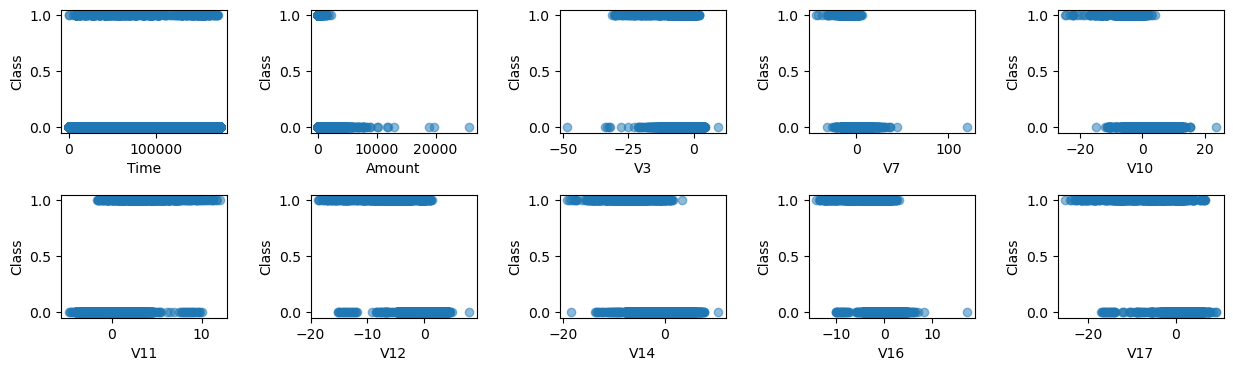

In [105]:
features = ['Time', 'Amount', 'V3', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
scatterplots(features, ncol=5, figsize=(15, 4))

No coorrelation with `Time` and `Amount`.\
Positive coorrelation with `V11`.\
Negtive correlation with other `V` features.

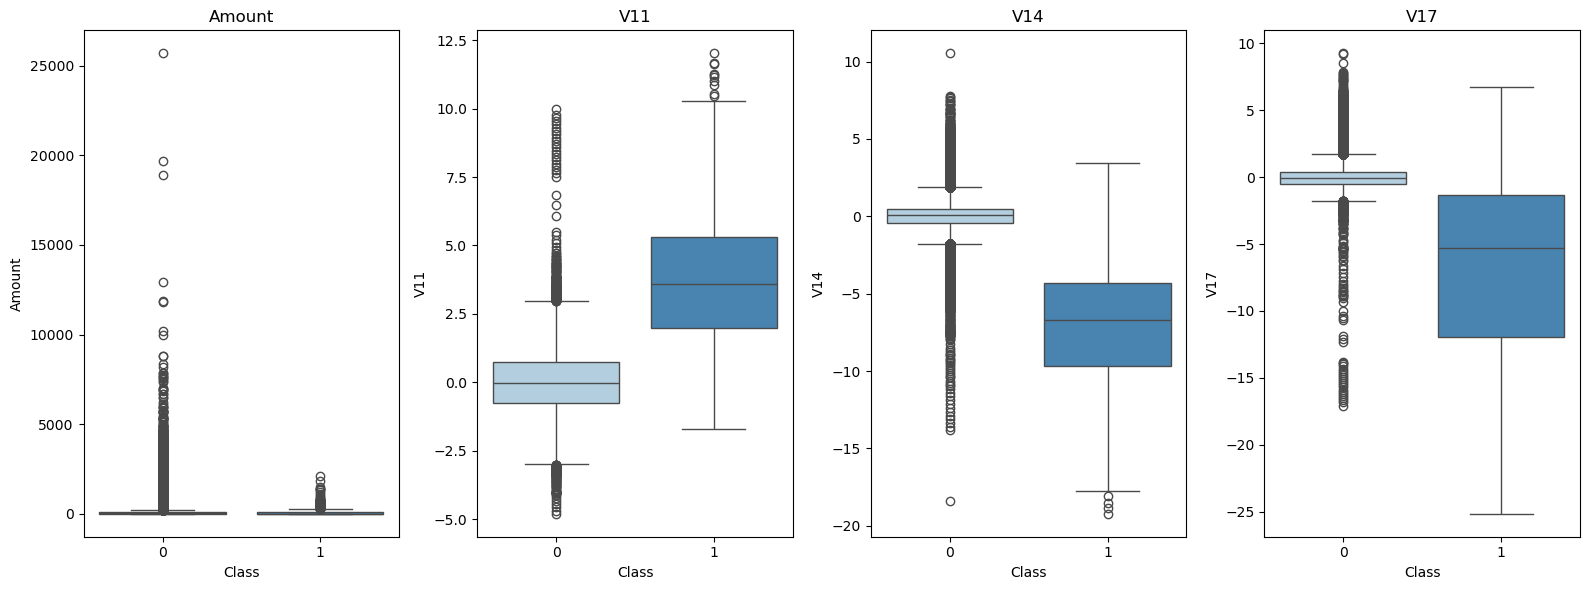

In [113]:
# Boxplots

plt.figure(figsize=(16, 6))
for i, feature in enumerate(['Amount', 'V11', 'V14', 'V17'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x='Class', y=feature, data=data, hue='Class', legend=False, palette="Blues")
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()

## 2.5 Summary<a id='2.5'></a>

There are **no** missing values in the credit card dataset.

Our **target** is the `Class` column, including 492 frauds (Class=1) out of 284,807 transactions. All other transactions are normal (Class=0).\
The dataset is highly unbalanced, the positive class (frauds) account for only 0.172% of all transactions.

The features are all **numeric**.\
Features `V1`, `V2`, … `V28` are the principal components obtained after applying with PCA.\
The only features which have not been transformed with PCA are `Time` and `Amount`. 

Since features `V1` to `V28` are transformed with PCA, they do not have linear correlation with each other.

The `Class` column has some positive and negative correlations with some `V` features but has no correlation with `Time` and `Amount`.